# DSAA5020 Group Project:
## Corporaci-n-Favorita-Grocery-Sales-Forecasting

## Task1- EDA-Part 3: EDA on Puzzled Data-transactions.csv&holidays_events.csv&oil.csv.


## 1. Preparation

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
import missingno as msno
import os
from subprocess import check_output
from tqdm.notebook import tqdm
import datetime
import calendar
from sort_dataframeby_monthorweek import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Memory Menagement
def calculate_memory_usage(df):
    memory = round(df.memory_usage(index=True).sum(), 3)
    return memory / 1024**2

# Reproducing from: https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_memory_usage(df):
    """Reduce memory usage of DataFrame by modifying data types."""
    start_memory = df.memory_usage().sum() / 1024**2
    print('Initial Memory Usage: {:.3f} MB'.format(start_memory))
    
    for col in tqdm(df.columns):
        col_dtype = df[col].dtype
        
        if col_dtype != object and col_dtype.name != 'category' and 'datetime' not in col_dtype.name:
            min_val = df[col].min()
            max_val = df[col].max()
            
            if str(col_dtype)[:3] == 'int':
                int_types = [np.int8, np.int16, np.int32, np.int64]
                for int_type in int_types:
                    if min_val > np.iinfo(int_type).min and max_val < np.iinfo(int_type).max:
                        df[col] = df[col].astype(int_type)
                        break
            else:
                float_types = [np.float16, np.float32, np.float64]
                for float_type in float_types:
                    if min_val > np.finfo(float_type).min and max_val < np.finfo(float_type).max:
                        df[col] = df[col].astype(float_type)
                        break
        elif 'datetime' not in col_dtype.name:
            df[col] = df[col].astype('category')

    end_memory = df.memory_usage().sum() / 1024**2
    print('Memory after Optimization: {:.3f} MB'.format(end_memory))
    print('Reduced by {:.1f}%'.format(100 * (start_memory - end_memory) / start_memory))
    
    return df


## 2.  Load Data with Memory Menagement Methods

In [3]:
#Reading transactions.csv
transactions_file_path = '.\\raw_data\\transactions.csv'
df_transactions = pd.read_csv(transactions_file_path, parse_dates=['date'])
print("Memory of Stores Dataframe --> %.3fMB"% calculate_memory_usage(df_transactions))

Memory of Stores Dataframe --> 1.911MB


In [4]:
import gc
gc.collect()

0

In [5]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [6]:
import calendar
#Adding year , month and day of week as features
df_transactions["year"] = df_transactions["date"].dt.year
df_transactions["month"] = df_transactions["date"].dt.month
df_transactions['day_of_week'] = df_transactions['date'].dt.day_name()

In [7]:
df_transactions

,date,store_nbr,transactions,year,month,day_of_week
0,2013-01-01,25,770,2013,1,Tuesday
1,2013-01-02,1,2111,2013,1,Wednesday
2,2013-01-02,2,2358,2013,1,Wednesday
3,2013-01-02,3,3487,2013,1,Wednesday
4,2013-01-02,4,1922,2013,1,Wednesday
...,...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,8,Tuesday
83484,2017-08-15,51,1573,2017,8,Tuesday
83485,2017-08-15,52,2255,2017,8,Tuesday
83486,2017-08-15,53,932,2017,8,Tuesday


In [8]:
#Reading holidays_events.csv
holidays_events_file_path = '.\\raw_data\\holidays_events.csv'
df_holidays_events = pd.read_csv(holidays_events_file_path,parse_dates=['date'])
print("Memory of Stores Dataframe --> %.3fMB"% calculate_memory_usage(df_holidays_events))

Memory of Stores Dataframe --> 0.014MB


In [9]:
import gc
gc.collect()

0

In [10]:
df_holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [11]:
df_holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [12]:
#Read oil.csv

#Reading stores.csv
oil_file_path = '.\\raw_data\\oil.csv'
df_oil = pd.read_csv(oil_file_path,parse_dates=['date'])
print("Memory of Stores Dataframe --> %.3fMB"% calculate_memory_usage(df_oil))

Memory of Stores Dataframe --> 0.019MB


In [13]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [14]:
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


## 4. Basic EDA on Puzzled Data

### (1) Basic Exploration On transactions

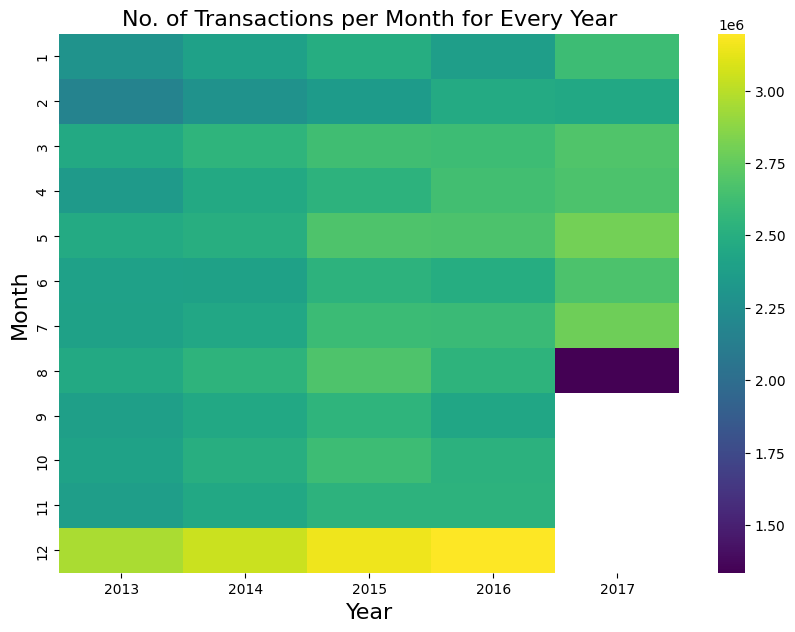

In [33]:
# Grouping by month and year and aggregating transactions
transactions_per_month_year = df_transactions.groupby(['month', 'year'], as_index=False)['transactions'].sum()

# Creating a pivot table for heatmap
heatmap_data = transactions_per_month_year.pivot(index='month', columns='year', values='transactions')

# Plotting a heatmap for number of transactions per month for each year
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, cmap='viridis')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Month', fontsize=16)
plt.title("No. of Transactions per Month for Every Year", fontsize=16)
plt.show()

# Clean up
del transactions_per_month_year

In [34]:
import gc
gc.collect()

6246

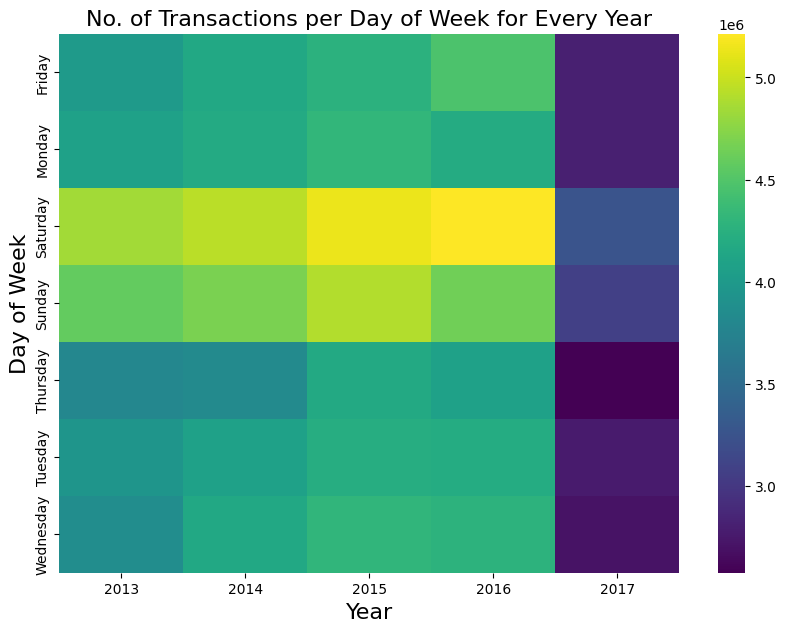

In [35]:
# Grouping by day_of_week and year while aggregating transactions
transactions_per_day_year = df_transactions.groupby(['day_of_week', 'year'], as_index=False)['transactions'].sum()

# Creating a pivot table for heatmap
heatmap_data_day_week = transactions_per_day_year.pivot(index='day_of_week', columns='year', values='transactions')

# Plotting a heatmap for number of transactions per day of the week for each year
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data_day_week, cmap='viridis')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Day of Week', fontsize=16)
plt.title("No. of Transactions per Day of Week for Every Year", fontsize=16)
plt.show()

# Clean up
del transactions_per_day_year


In [36]:
import gc
gc.collect()

5664

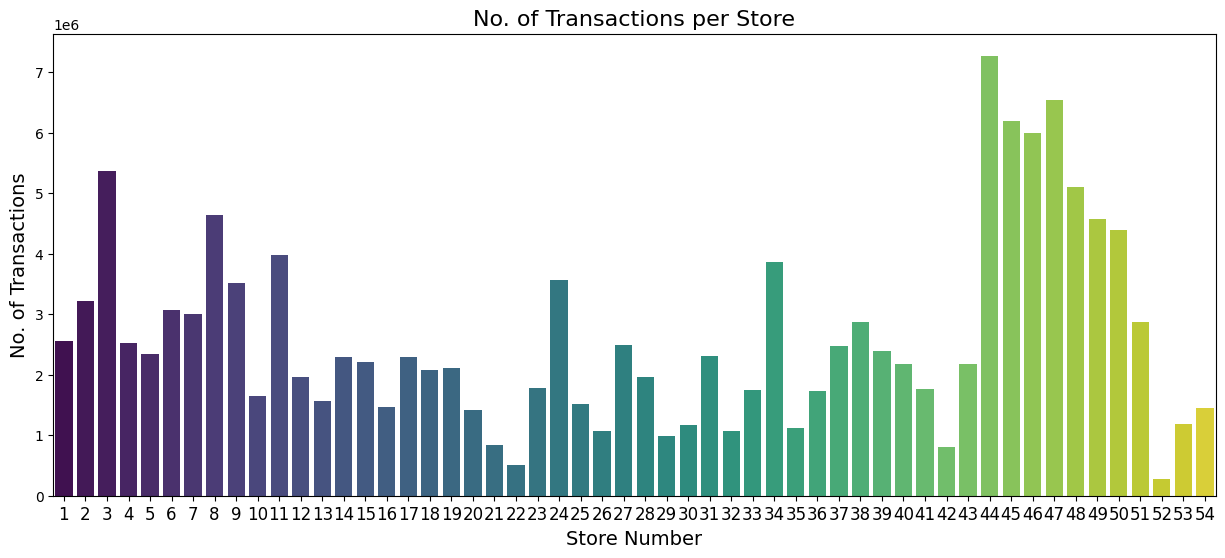

In [38]:
# Grouping by store_nbr and summing transactions for each store_nbr
transactions_per_store = df_transactions.groupby('store_nbr')['transactions'].sum().reset_index()

# Plotting a bar plot for number of transactions per store
plt.figure(figsize=(15, 6))
sns.barplot(x='store_nbr', y='transactions', data=transactions_per_store, palette='viridis')
plt.title('No. of Transactions per Store', fontsize=16)
plt.xlabel('Store Number', fontsize=14)
plt.ylabel('No. of Transactions', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.show()

# Clean up
del transactions_per_store


In [39]:
import gc
gc.collect()

372

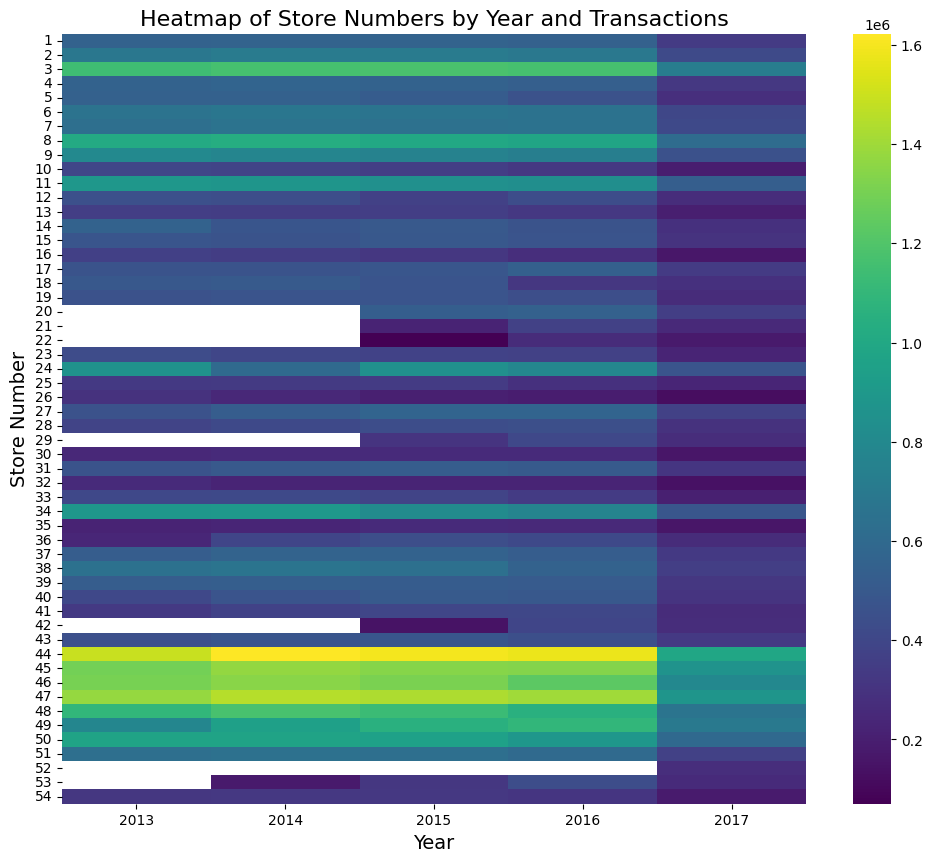

In [40]:
# Group by store_nbr, year and sum of transactions
transactions_year_store = df_transactions.groupby(['store_nbr', 'year'], as_index=False).agg({'transactions': 'sum'})

# Plotting a heatmap of store_nbr, year, and number of transactions
transactions_pivot = transactions_year_store.pivot(index="store_nbr", columns="year", values="transactions")
plt.figure(figsize=(12, 10))
sns.heatmap(transactions_pivot, cmap='viridis')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Store Number', fontsize=14)
plt.title('Heatmap of Store Numbers by Year and Transactions', fontsize=16)
plt.show()

# Clean up
del transactions_year_store, transactions_pivot


In [15]:
import gc
gc.collect()

3915

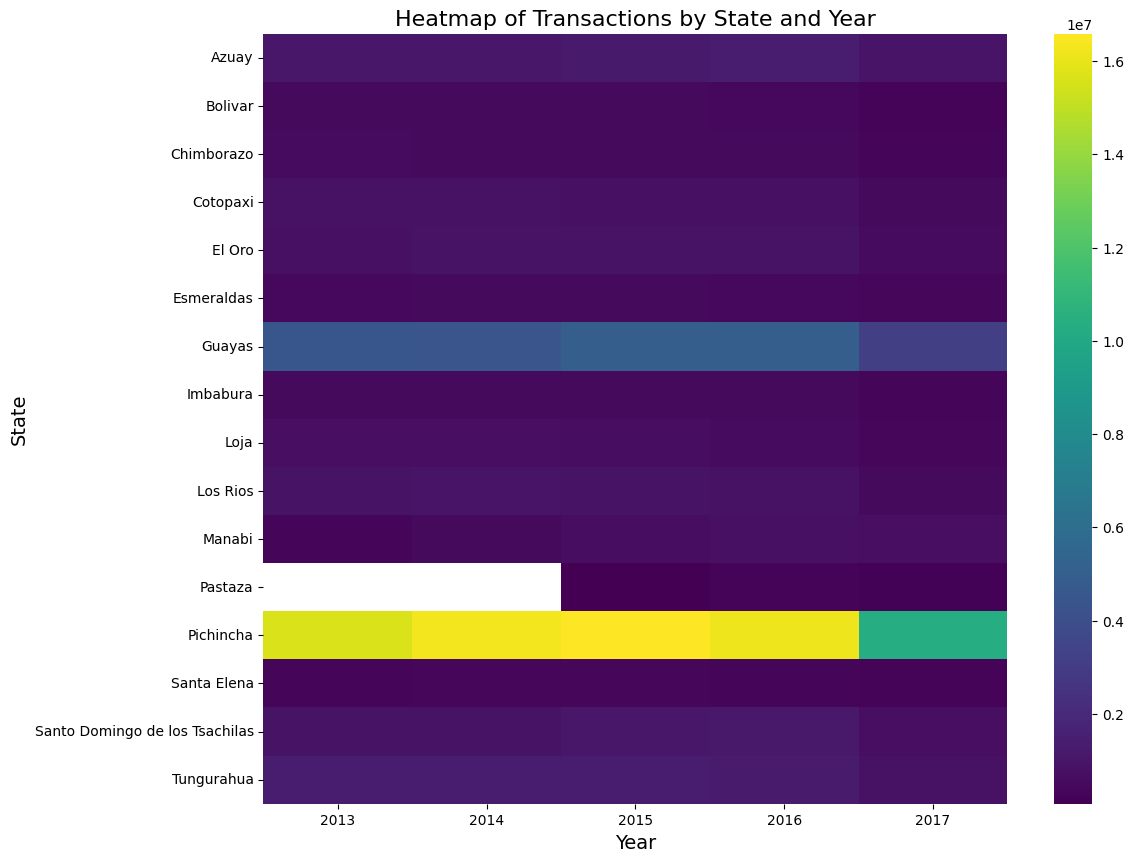

In [43]:
#Reading stores.csv
stores_file_path = '.\\raw_data\\stores.csv'
df_stores = pd.read_csv(stores_file_path)

# Merging transactions dataframe and stores dataframe
transactions_store = pd.merge(df_transactions, df_stores, on='store_nbr')

# Group by state, year and sum of transactions
transactions_by_state_year = transactions_store.groupby(['state', 'year'], as_index=False).agg({'transactions': 'sum'})

# Plotting heat map of state, year, and number of transactions
transactions_pivot = transactions_by_state_year.pivot(index="state", columns="year", values="transactions")
plt.figure(figsize=(12, 10))
sns.heatmap(transactions_pivot, cmap='viridis')
plt.xlabel('Year', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.title('Heatmap of Transactions by State and Year', fontsize=16)
plt.show()

# Clean up
del transactions_store, transactions_by_state_year, transactions_pivot


In [44]:
import gc
gc.collect()

54581

### (2) Basic Exploration On Holidays_events

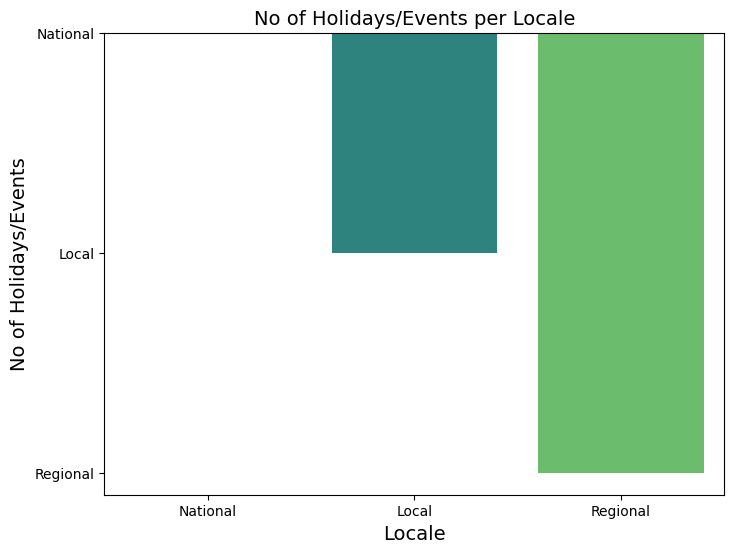

In [45]:
# Fetching the number of days for each locale 
holidays_per_locale = df_holidays_events['locale'].value_counts().to_frame()

# Plotting Locale vs number of days
plt.figure(figsize=(8, 6))
sns.barplot(x=holidays_per_locale.index, y="locale", data=holidays_per_locale, palette='viridis')
plt.title('No of Holidays/Events per Locale', fontsize=14)
plt.xlabel('Locale', fontsize=14)
plt.ylabel('No of Holidays/Events', fontsize=14)
plt.show()

# Clean up
del holidays_per_locale


In [21]:
import gc
gc.collect()

269

<Figure size 1200x1000 with 0 Axes>

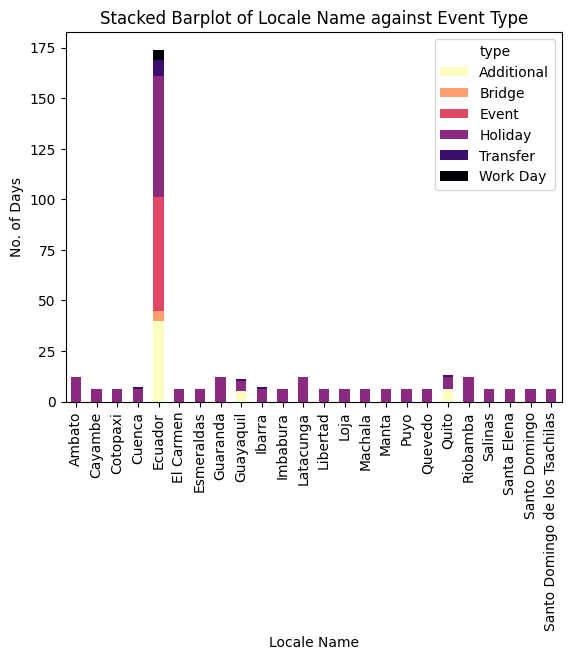

In [47]:
# Grouping by locale_name and type and counting the occurrences
holiday_counts = df_holidays_events.groupby(['locale_name', 'type']).size()

# Plotting a stacked bar plot of Locale_name and type vs number of days
plt.figure(figsize=(12, 10))
holiday_counts.unstack().plot(kind='bar', stacked=True, colormap='magma_r', grid=False)
plt.title('Stacked Barplot of Locale Name against Event Type')
plt.ylabel('No. of Days')
plt.xlabel('Locale Name')
plt.show()


In [49]:
import gc
gc.collect()

20132

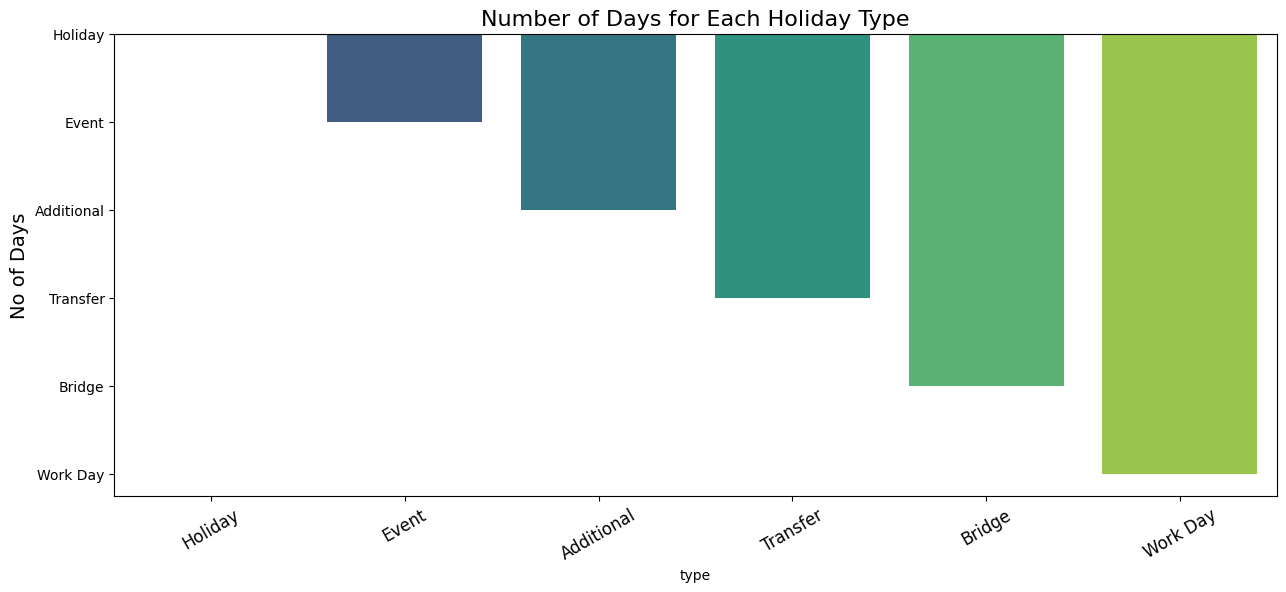

In [51]:
# Counting the number of days for each holiday type
days_per_holiday = df_holidays_events['type'].value_counts().to_frame()

# Plotting holiday type vs number of days
plt.figure(figsize=(15, 6))
sns.barplot(x=days_per_holiday.index, y='type', data=days_per_holiday, palette='viridis')
plt.xticks(rotation=30, fontsize=12)
plt.ylabel('No of Days', fontsize=14)
plt.title('Number of Days for Each Holiday Type', fontsize=16)
plt.show()

# Clean up
del days_per_holiday


In [52]:
import gc
gc.collect()

1038

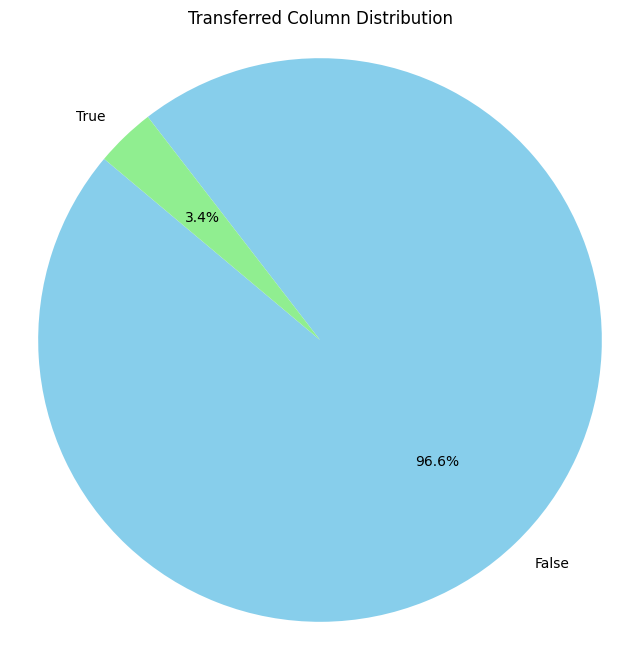

In [53]:
# Pie plot showing information about the 'transferred' column
transferred_counts = df_holidays_events['transferred'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(transferred_counts, labels=['False', 'True'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Transferred Column Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [54]:
import gc
gc.collect()

6103

### (3) Basic Exploration On Oil

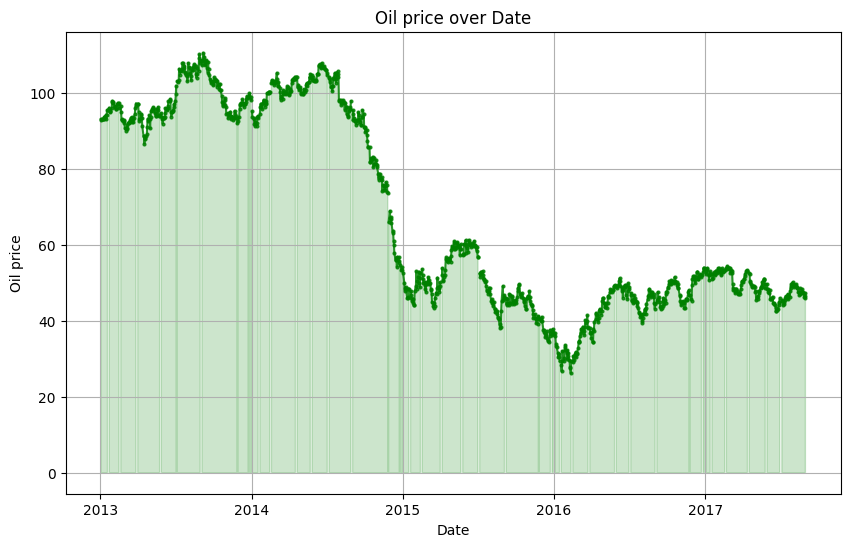

In [61]:
# Plotting Oil price over Date using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_oil['date'], df_oil['dcoilwtico'], marker='o', markersize=2, color='green', alpha=0.8)
plt.fill_between(df_oil['date'], df_oil['dcoilwtico'], alpha=0.2, color='green')
plt.title('Oil price over Date')
plt.xlabel('Date')
plt.ylabel('Oil price')
plt.grid(True)
plt.show()

In [18]:
# Reading and optimizing test data
test_file_path = '.\\raw_data\\test.csv'
df_test = pd.read_csv(test_file_path)

# Storing optimized data types of test dataframe for loading the train dataframe
dtypes_dict = dict(df_test.dtypes)
del dtypes_dict['date'], dtypes_dict['onpromotion']
del df_test
import gc
gc.collect()

# Loading train data with optimized data types from test dataframe
train_file_path = '.\\raw_data\\train.csv'
df_train = pd.read_csv(train_file_path, parse_dates=['date'], dtype=dtypes_dict)

# Reducing memory usage of train dataframe
df_train = reduce_memory_usage(df_train)

#Filtering data having year = 2016 only
df_train=df_train[df_train["date"].dt.year==2016]

import gc
gc.collect()

# Merging store dataframe with sales dataframe
holiday_sales = df_train.merge(df_holidays_events, how='inner', on='date')
holiday_sales = reduce_memory_usage(holiday_sales)
print("Memory of store_sales Dataframe: %.3f MB" % calculate_memory_usage(holiday_sales))

del df_train
import gc
gc.collect()

Memory of store_sales Dataframe: 220.612 MB


597

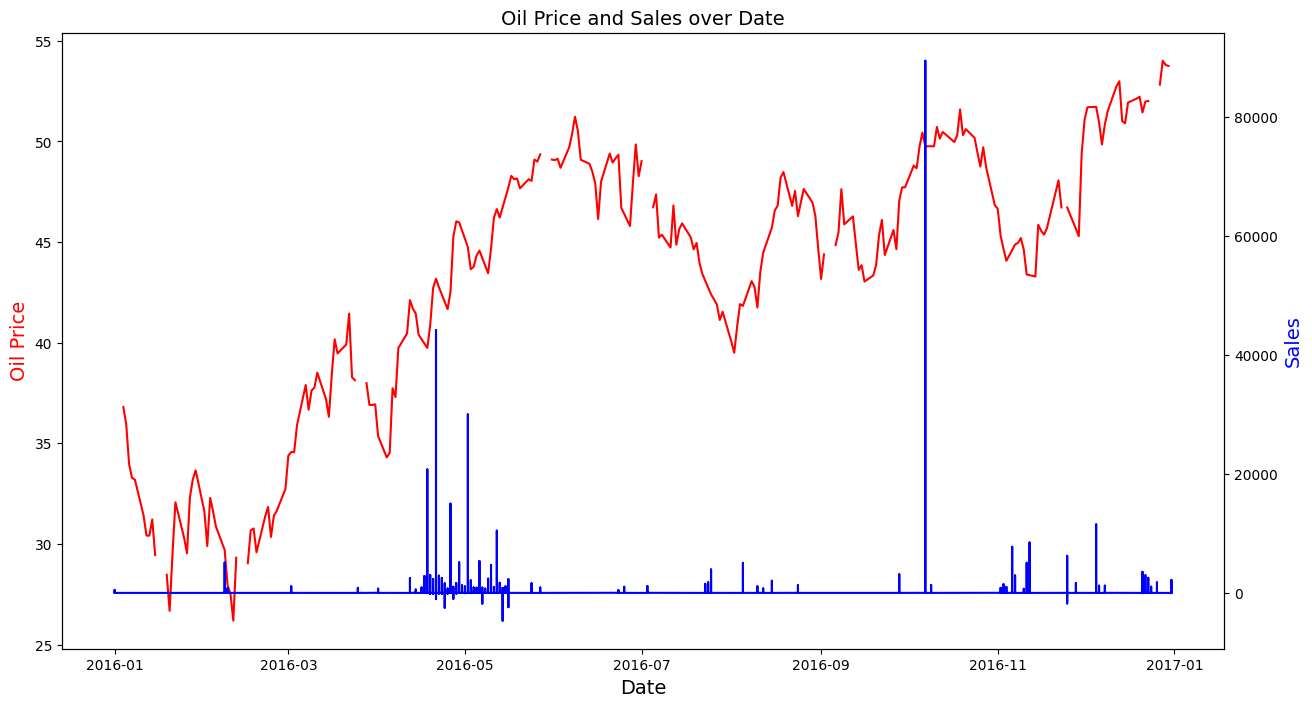

In [20]:
# Filtering data only for year 2016
df_oil = df_oil[df_oil["date"].dt.year == 2016]

# Plotting date vs oil price (1st y axis)
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.plot(df_oil['date'], df_oil['dcoilwtico'], color="red")
ax1.set_xlabel("Date", fontsize=14)
ax1.set_ylabel("Oil Price", color="red", fontsize=14)

# Creating a second y-axis for unit_sales
ax2 = ax1.twinx()
ax2.plot(holiday_sales['date'], holiday_sales['unit_sales'], color="blue")
ax2.set_ylabel("Sales", color="blue", fontsize=14)

plt.title('Oil Price and Sales over Date', fontsize=14)
plt.show()
